# Models from the R stemming process

In [189]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [190]:
data = pd.read_csv('../../datasets/data-stemmed-R.csv')
data.info()
Y = data['engagement.rate']
X = data.drop(columns=['engagement.rate'])
X.info()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Columns: 284 entries, chicken to n_emoji
dtypes: bool(9), float64(269), int64(6)
memory usage: 8.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Columns: 283 entries, chicken to n_emoji
dtypes: bool(9), float64(268), int64(6)
memory usage: 8.6 MB


In [191]:
def CVTest(model, str_model, X, Y, data, reg_metrics: pd.DataFrame, n_splits = 10, top_n_features = 25):
    kf = KFold(n_splits, shuffle=True)
    feature_names= data.drop(columns=['engagement.rate']).columns.tolist()   # Get list of feature names from the dataframe
    total_feature_importance = np.zeros(len(X.columns.tolist()))   # Initialize array to hold feature importances
    for train_index, test_index in kf.split(X):
        start_learn = time.time()
        model.fit(X.iloc[train_index], Y.iloc[train_index])
        end_learn = time.time()
        exe_time_learn = end_learn - start_learn

        # Feature importance calculation for applicable models
        if hasattr(model, 'feature_importances_'):
            feature_importance = model.feature_importances_
            total_feature_importance += feature_importance  # Accumulate feature importance for mean calculation
        else:
            print("This model does not provide feature importances.")
        
        start_pred = time.time()
        Y_pred = model.predict(X.iloc[test_index])
        end_pred = time.time()
        exe_time_pred = end_pred - start_pred

        current_mae = mean_absolute_error(Y.iloc[test_index], Y_pred)
        current_mse = mean_squared_error(Y.iloc[test_index], Y_pred)
        current_rmse = mean_squared_error(Y.iloc[test_index], Y_pred, squared=False)
        reg_metrics.loc[len(reg_metrics)] = [str_model.upper(), current_mae, current_mse, current_rmse, exe_time_learn, exe_time_pred]
    
    # Calculate mean importance over all folds
    mean_feature_importance = total_feature_importance / n_splits
    importance_df = pd.DataFrame({'Feature': feature_names, 'Mean Importance': mean_feature_importance})
    top_features = importance_df.nlargest(top_n_features, 'Mean Importance')
    print(f"Top {top_n_features} features based on mean importance over all folds:")
    print(top_features[['Feature', 'Mean Importance']])


In [192]:
reg_metrics_text = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'TIME_LEARN', 'TIME_PREDICT'])

This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.


This model does not provide feature importances.
Top 25 features based on mean importance over all folds:
                     Feature  Mean Importance
0                    chicken              0.0
1                   fastfood              0.0
2                       fire              0.0
3                       food              0.0
4                      foodi              0.0
5                    foodpic              0.0
6                        fri              0.0
7                   homecook              0.0
8      homecookingvsfastfood              0.0
9   homecookingvsfastfoodcom              0.0
10                       hot              0.0
11                    myfood              0.0
12                      sauc              0.0
13                    season              0.0
14                       yum              0.0
15                       via              0.0
16                      face              0.0
17                    famili              0.0
18                  

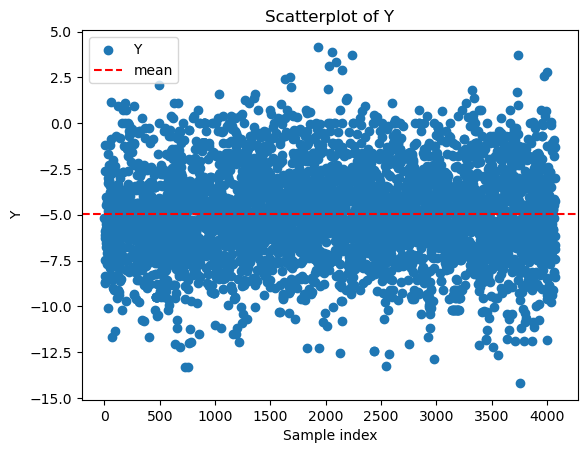

In [193]:
dummy = DummyRegressor()
CVTest(dummy, 'dummy', X, Y, data, reg_metrics_text)

#Scatterplot of Y
mean_y = np.mean(Y)
plt.scatter(np.arange(len(Y)), Y, label='Y')
plt.axhline(y=mean_y, color='r', linestyle='--', label='mean')    # Plot the mean
plt.title('Scatterplot of Y')
plt.xlabel('Sample index')
plt.ylabel('Y')
plt.legend()
plt.show()

In [194]:
# Decision Tree Regressor
# Initialize a decision tree regressor instance
tree_regressor = DecisionTreeRegressor()    # Try tuning on the hyperparameters: max_depth, min_samples_leaf, min_samples_split
CVTest(tree_regressor, 'tree', X, Y, data, reg_metrics_text)

Top 25 features based on mean importance over all folds:
                 Feature  Mean Importance
278          user.tweets         0.353456
279       user.following         0.182256
280           user.media         0.121379
268               quotes         0.086950
269           is.retweet         0.030963
281           n_hashtags         0.026093
277         user.website         0.015724
282              n_emoji         0.007330
3                   food         0.006403
271             pictures         0.004844
14                   yum         0.004671
211                thank         0.003689
272               videos         0.003614
274  multimedial_content         0.002797
97                   eat         0.002606
276             user.bio         0.002180
24                  make         0.002032
7               homecook         0.001970
77                 everi         0.001964
4                  foodi         0.001964
78                 india         0.001918
0                ch

In [195]:
# Random Forest Regressor
# Initialize a random forest regressor instance
rf_regressor = RandomForestRegressor(random_state=42)   # Try tuning on the hyperparameters: n_estimators, max_depth, min_samples_leaf, min_samples_split
CVTest(rf_regressor, 'rf', X, Y, data, reg_metrics_text)

In [ ]:
sv_regressor = SVR()    #Try tuning on the kernel
CVTest(sv_regressor, 'svm', X, Y, data, reg_metrics_text)

This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
Top 10 features based on mean importance over all folds:
   Feature  Mean Importance
0        0              0.0
1        1              0.0
2        2              0.0
3        3              0.0
4        4              0.0
5        5              0.0
6        6              0.0
7        7              0.0
8        8              0.0
9        9              0.0


In [ ]:
knn_regressor = KNeighborsRegressor()       #Try tuning on the hyperparameters: n_neighbors, weights
CVTest(knn_regressor, 'knn', X, Y, data, reg_metrics_text)

This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
This model does not provide feature importances.
Top 10 features based on mean importance over all folds:
   Feature  Mean Importance
0        0              0.0
1        1              0.0
2        2              0.0
3        3              0.0
4        4              0.0
5        5              0.0
6        6              0.0
7        7              0.0
8        8              0.0
9        9              0.0


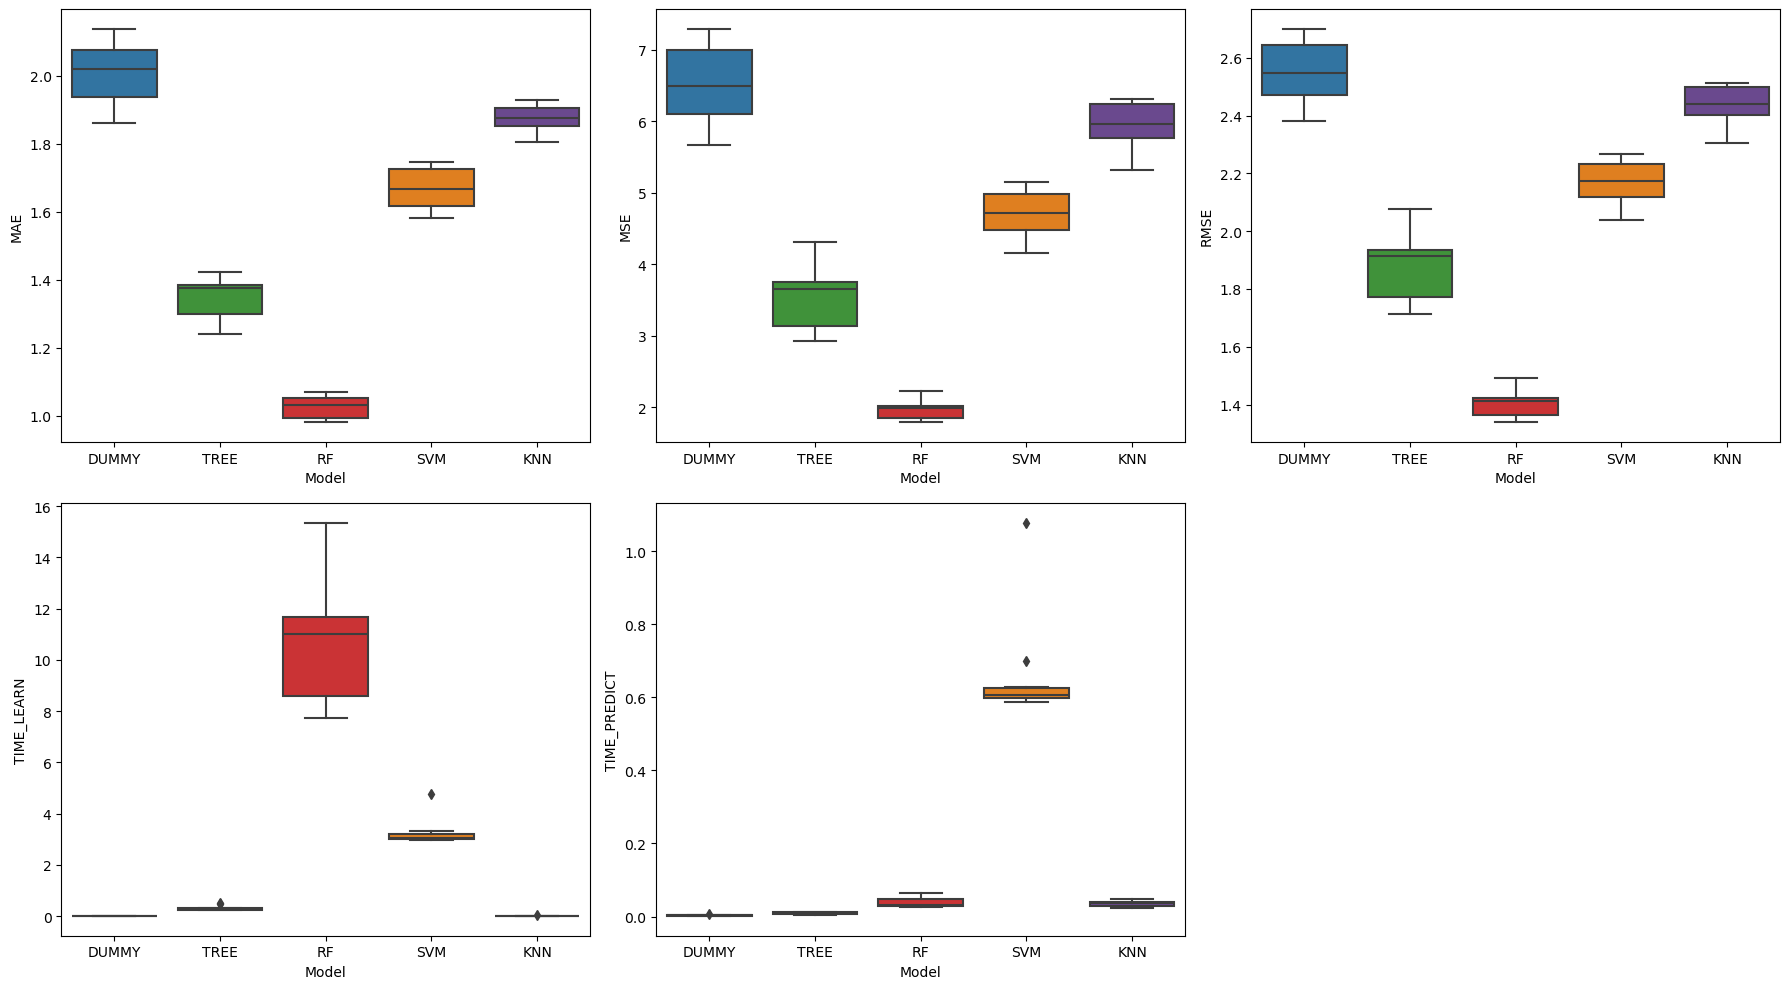

278


In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(data=reg_metrics_text, x="Model", y="MAE", ax=axs[0, 0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="MSE", ax=axs[0, 1], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="RMSE", ax=axs[0, 2], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="TIME_LEARN", ax=axs[1, 0], palette=sns.color_palette('Paired')[1::2])
sns.boxplot(data=reg_metrics_text, x="Model", y="TIME_PREDICT", ax=axs[1, 1], palette=sns.color_palette('Paired')[1::2])

# Hide the empty subplot (if any)
axs[1, 2].axis('off')



plt.tight_layout()
plt.show()

print(X.columns[278])